In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#Help from learn platform and stack overflow

In [11]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [25]:
df = pd.read_csv("https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv")
#print(df.head())
#print(df.isna().sum())
df['Defaulted'].value_counts()
df['Defaulted'].fillna(1, inplace = True)
print(df.isna().sum())

Unnamed: 0         0
Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64


In [26]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


Text(0, 0.5, 'inertia')

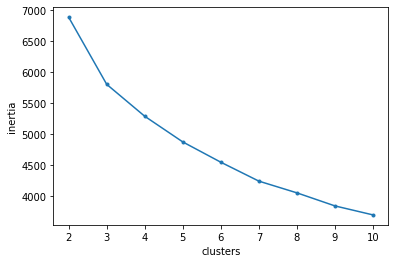

In [27]:
inertias = []
for k in range (2, 11):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(scaled_df)
        inertias.append(kmeans.inertia_)

plt.plot(range(2, 11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

Text(0, 0.5, 'Silhouette Score')

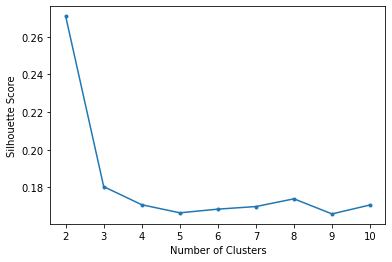

In [28]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
plt.plot(range(2,11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

Based on the above graphs, it appears k = 2 is our best bet, mainly because the silhouette score dramatically decreases from 2 to 3.  